# Exercise
Load the wine data set, but this time build a model that predicts the quality of the wine. This exercise treats the quality value as a regression prediction. We can use round() to move it to the closest integer value. 

Regression is much quicker than large categorical value prediction - as we only need a single output, and the functions remain continious throughout.

In [1]:
# Load our primary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


In [123]:
# Load raw data
red_file = 'winequality-red.csv'
white_file = 'winequality-white.csv'

# Read in white wine data 
white = pd.read_csv(white_file, sep=';')

# Read in red wine data 
red = pd.read_csv(red_file, sep=';')

print(red.shape)
print(white.shape)

(1599, 12)
(4898, 12)


In [124]:
# Let's build a single data set, with type distinguishing between red and white wine

# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
# We ignore the white index, and instead extend the red index
wines = red.append(white, ignore_index=True)

In [136]:
# That is a nifty function -I prefer tolist() for clarity
Y = wines['quality']

# Specify the data - nifty drop function
X = wines.drop('quality', axis=1)

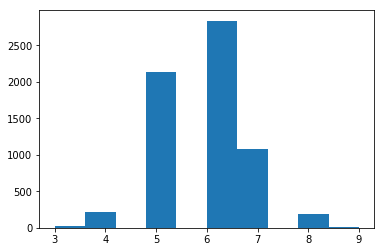

In [137]:
# Quickly check histogram
plt.hist(y, bins=10)
plt.show()

In [138]:
# scale our test and train data
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

X=StandardScaler().fit_transform(X)

In [159]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

seed = 42
np.random.seed(seed)

from keras.optimizers import SGD, RMSprop
sgd=SGD(lr=0.1)


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, Y):
    model = Sequential()
    model.add(Dense(64, input_dim=12, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=sgd, loss='mse', metrics=['mae'])
    #model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.fit(X[train], Y[train], epochs=10, verbose=1)

Epoch 1/10
5195/5195 [==============================] - 1s 247us/step - loss: 5.5768 - mean_absolute_error: 0.8822
Epoch 2/10
5195/5195 [==============================] - 0s 89us/step - loss: 0.5409 - mean_absolute_error: 0.5858
Epoch 3/10
5195/5195 [==============================] - 0s 96us/step - loss: 0.5271 - mean_absolute_error: 0.5719
Epoch 4/10
5195/5195 [==============================] - 0s 89us/step - loss: 0.5204 - mean_absolute_error: 0.5692
Epoch 5/10
5195/5195 [==============================] - 0s 89us/step - loss: 0.5099 - mean_absolute_error: 0.5617
Epoch 6/10
5195/5195 [==============================] - 0s 88us/step - loss: 0.5063 - mean_absolute_error: 0.5653
Epoch 7/10
5195/5195 [==============================] - 1s 97us/step - loss: 0.5063 - mean_absolute_error: 0.5622
Epoch 8/10
5195/5195 [==============================] - 0s 90us/step - loss: 0.4885 - mean_absolute_error: 0.5484
Epoch 9/10
5195/5195 [==============================] - 1s 106us/step - loss: 0.4886 - 

In [160]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 64)                832       
_________________________________________________________________
dense_90 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


[array([[  2.75775250e-02,  -1.19957812e-01,   5.95042929e-02,
           3.64911333e-02,   4.04928923e-02,  -4.28138184e-04,
           5.30154593e-02,  -1.66557372e-01,  -8.72983336e-02,
          -2.56468713e-01,  -1.24107555e-01,   2.10258082e-01,
           2.07250163e-01,  -4.21290062e-02,   2.37370506e-01,
           1.58762522e-02,  -3.28575522e-02,  -1.63082063e-01,
           1.50241014e-02,   9.23354104e-02,  -1.64984465e-01,
           9.07998011e-02,   6.46984503e-02,   1.22461721e-01,
          -2.63118327e-01,  -3.63470197e-01,   4.70457673e-02,
           1.71025187e-01,  -1.44798666e-01,   2.00597718e-01,
           3.72499347e-01,   2.70307004e-01,  -1.99192315e-01,
          -2.75077462e-01,  -4.53150794e-02,   1.99024543e-01,
          -1.74346343e-01,   3.31663638e-01,   1.62411302e-01,
           1.69422314e-01,   8.70991051e-02,   3.50422680e-01,
          -1.78137422e-01,  -7.81351700e-02,  -2.50216305e-01,
          -2.31722474e-01,  -7.92011395e-02,  -1.230333

In [161]:
y_pred = model.predict(X[:500])
y_pred = y_pred.round()

In [162]:
y_pred_binary[:10]

array([[ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 6.]], dtype=float32)

In [163]:
Y[:10]

0    5
1    5
2    5
3    6
4    5
5    5
6    5
7    7
8    7
9    5
Name: quality, dtype: int64